# Taylor Diagrams

## Overview

Taylor diagrams are a "concise statistical summary of how well patterns match each other in terms of their correlation, their root-mean-square difference and the ratio of their variances". Taylor diagrams plot the weighted centered pattern correlations, the ratios of the normalized root-mean-squared differences between the test and reference data sets, and optionally a bias statistic. This notebook explores how to create and customize Taylor diagrams using `geocat-viz`.

1. Creating a Simple Taylor Diagram
1. Displaying Distinct Datasets
1. Finishing Touches



## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Matplotlib](https://foundations.projectpythia.org/core/matplotlib.html) | Necessary | |

- **Time to learn**: 50 minutes

---

In [6]:
import matplotlib.pyplot as plt
import numpy as np

import geocat.viz as gv

"Generally, the plotted values are derived from climatological monthly, seasonal or annual means. Because the different variables (eg: precipitation, temperature) may have widely varying numerical values, the results are normalized by the reference variables. The ratio of the normalized variances indicates the relative amplitude of the model and observed variations." - from NCL

## Creating a Simple Taylor Diagram

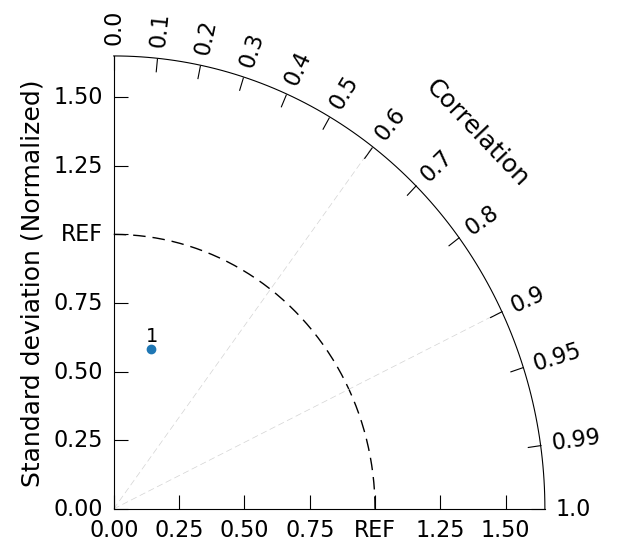

In [39]:
# Create figure and Taylor Diagram instance
fig = plt.figure(figsize=(6, 6))
taylor = gv.TaylorDiagram(fig=fig, label='REF')

# Draw diagonal dashed lines from origin to correlation values
# Also enforces proper X-Y ratio
taylor.add_xgrid(np.array([0.6, 0.9]))

# Add a model dataset of one point
taylor.add_model_set(stddev=[.6], corrcoef=[.24]);

## Displaying Distinct Datasets

When working with data, you'll want to make two datasets distinct by providing different kwargs for how to draw them.

First let's creat two sets of dummy data:

In [50]:
# Case A
a_std = [1.230, 0.988, 1.092, 1.172, 1.064, 0.966, 1.079, 0.781]  # standard deviation
a_cc = [0.958, 0.973, 0.740, 0.743, 0.922, 0.982, 0.952, 0.433]  # correlation coefficient

# Case B
b_std = [1.129, 0.996, 1.016, 1.134, 1.023, 0.962, 1.048, 0.852]  # standard deviation
b_cc = [0.963, 0.975, 0.801, 0.814, 0.946, 0.984, 0.968, 0.647]  # correlation coefficient

And let's plot it:

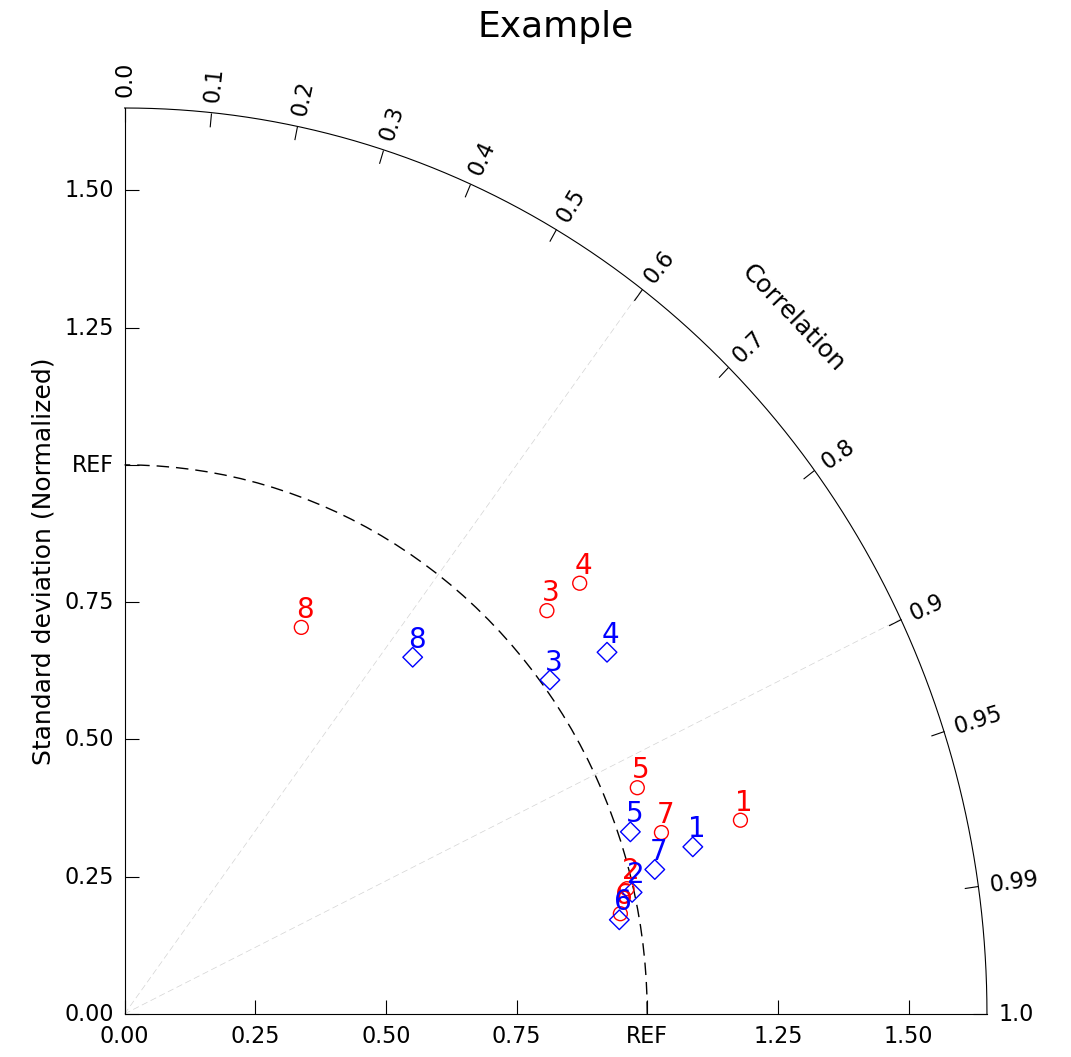

In [51]:
# Create figure and Taylor Diagram instance
fig = plt.figure(figsize=(12, 12))
taylor = gv.TaylorDiagram(fig=fig, label='REF')
ax = plt.gca()

# Draw diagonal dashed lines from origin to correlation values
# Also enforces proper X-Y ratio
taylor.add_xgrid(np.array([0.6, 0.9]))

# Add model sets for p and t datasets
taylor.add_model_set(
    a_std,
    a_cc,
    fontsize=20,
    xytext=(-5, 10),  # marker label location, in pixels
    color='red',
    marker='o',
    facecolors='none',
    s=100)  # marker size
taylor.add_model_set(
    b_std,
    b_cc,
    fontsize=20,
    xytext=(-5, 10),  # marker label location, in pixels
    color='blue',
    marker='D',
    facecolors='none',
    s=100)

# Add figure title
plt.title("Example", size=26, pad=45);

## Finishing touches

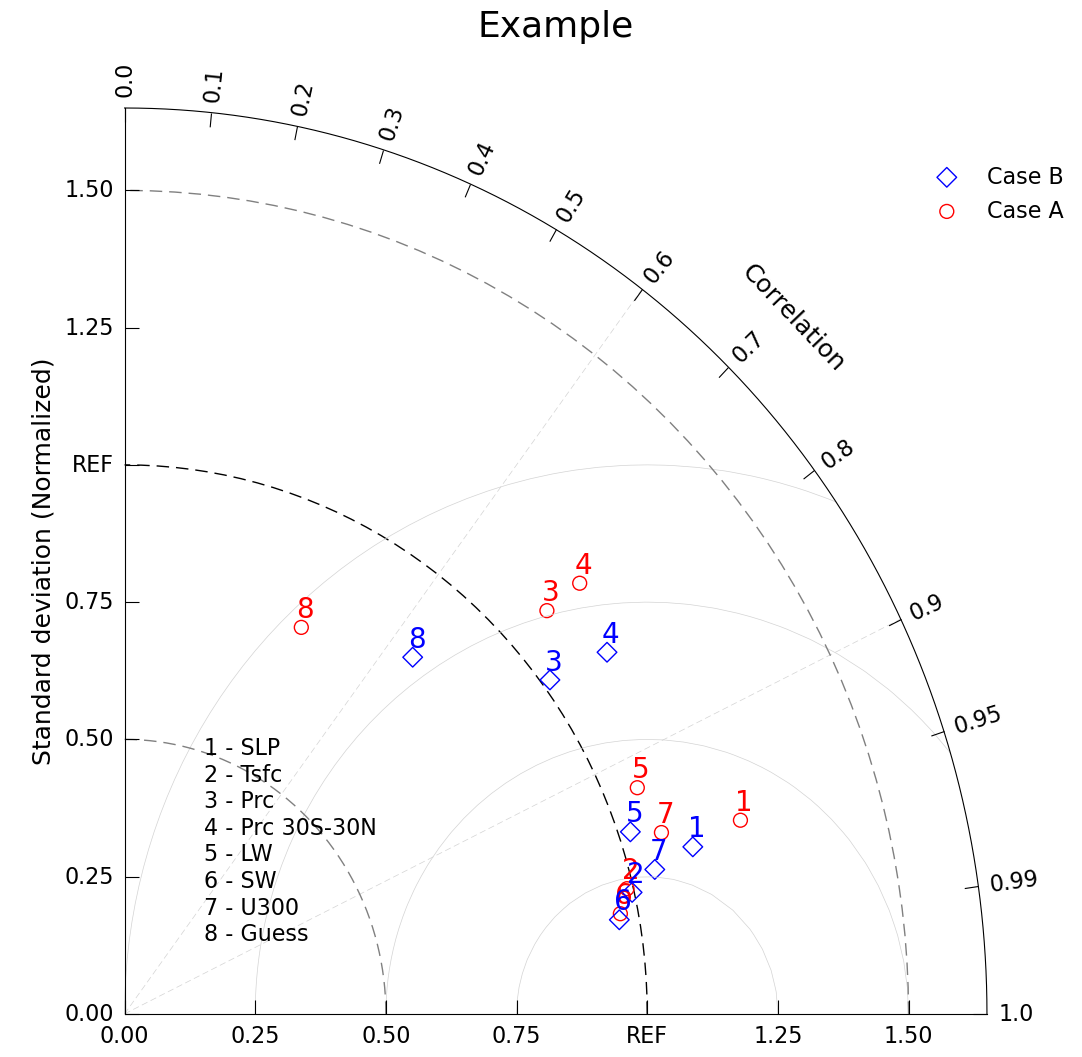

In [54]:
# Create figure and Taylor Diagram instance
fig = plt.figure(figsize=(12, 12))
taylor = gv.TaylorDiagram(fig=fig, label='REF')
ax = plt.gca()

# Draw diagonal dashed lines from origin to correlation values
# Also enforces proper X-Y ratio
taylor.add_xgrid(np.array([0.6, 0.9]))

# Add model sets for p and t datasets
taylor.add_model_set(
    a_std,
    a_cc,
    fontsize=20,
    xytext=(-5, 10),  # marker label location, in pixels
    color='red',
    marker='o',
    facecolors='none',
    label='Case A',
    s=100)  # marker size
taylor.add_model_set(
    b_std,
    b_cc,
    fontsize=20,
    xytext=(-5, 10),  # marker label location, in pixels
    color='blue',
    marker='D',
    facecolors='none',
    label='Case B',
    s=100)

# Add Add constant centered RMS difference contours.
taylor.add_contours(levels=np.arange(0, 1.1, 0.25),
                 colors='lightgrey',
                 linewidths=0.5)

# Add more standard deviation grid lines
taylor.add_ygrid(np.array([0.5, 1.5]), color='grey')

# Add figure title
plt.title("Example", size=26, pad=45);

# Add model name
namearr = ['SLP', 'Tsfc', 'Prc', 'Prc 30S-30N', 'LW', 'SW', 'U300', 'Guess']
taylor.add_model_name(namearr, fontsize=16)

# Add figure legend
taylor.add_legend(fontsize=16);

---

## Summary

### What's next?


## Resources and references

- [Karl E. Taylor - "Summarizing multiple aspects of model performance in a single diagram", AGU 2001](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2000JD900719)
- [Plotting with GeoCAT Tutorial](https://github.com/anissa111/plotting-with-geocat-tutorial/blob/main/notebooks/02-geocat-viz.ipyn)
- [NCL Graphics: Taylor Diagrams](https://www.ncl.ucar.edu/Applications/taylor.shtml)